In [1]:
import keras
keras.__version__

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.0'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

In [16]:
import matplotlib.pyplot as plt

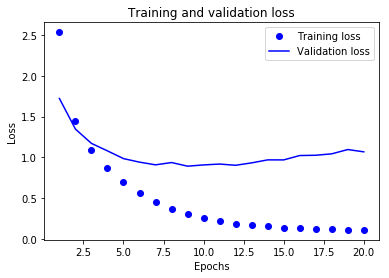

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

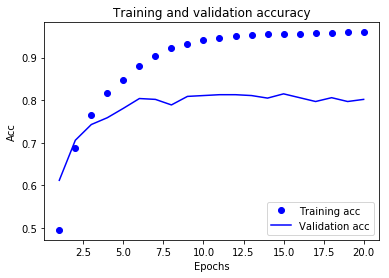

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 115us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 83us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 83us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 83us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 83us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 1s 83us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 1s 83us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/8
224

In [20]:
results

[0.9844293269533614, 0.7836153161175423]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19679430097951914

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0000001

In [25]:
np.argmax(predictions[0])

3

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.7073 - acc: 0.4411 - val_loss: 2.0155 - val_acc: 0.5930
Epoch 2/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.7341 - acc: 0.6183 - val_loss: 1.6573 - val_acc: 0.6100
Epoch 3/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.4678 - acc: 0.6359 - val_loss: 1.5688 - val_acc: 0.6080
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.3273 - acc: 0.6446 - val_loss: 1.4833 - val_acc: 0.6170
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.2168 - acc: 0.6498 - val_loss: 1.4540 - val_acc: 0.6250
Epoch 6/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.1265 - acc: 0.6753 - val_loss: 1.4326 - val_acc: 0.6350
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.0522 - acc: 0.6944 - val_loss: 1.4520 - val_acc: 0.6420
Epoch 

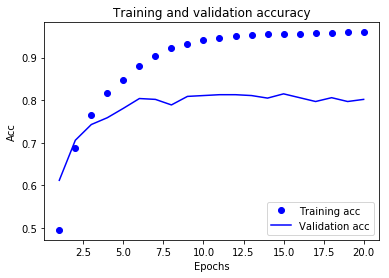

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [30]:
def plot_loss_and_acc(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = np.arange(len(loss))

    fig = plt.figure()
    
    ax1 = fig.add_subplot(121)
    ax1.plot(epochs, loss, label='Training loss')
    ax1.plot(epochs, val_loss, label='Validation loss')
    ax1.grid(ls='--')
    ax1.legend()
    
    ax2 = fig.add_subplot(122)
    ax2.plot(epochs, acc, label='Training acc')
    ax2.plot(epochs, val_acc, label='Validation acc')
    ax2.grid(ls='--')
    ax2.legend()

    plt.show()


def further_experiments(hidden_layers=2, 
                        units=64):
    print('hidden_layers={}, units={}\n'.format(hidden_layers, units))
    model = models.Sequential()
    model.add(layers.Dense(units, activation='relu', input_shape=(10000,)))
    for i in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])
    history = model.fit(partial_x_train, 
                        partial_y_train, 
                        epochs=20, 
                        batch_size=512,
                        validation_data=(x_val, y_val), verbose=0)
    plot_loss_and_acc(history)
    print('Test accuracy: %.4f\n' % model.evaluate(x_test, one_hot_test_labels, verbose=0)[1])

hidden_layers=2, units=64



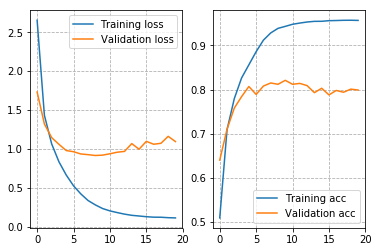

Test accuracy: 0.7796

hidden_layers=2, units=32



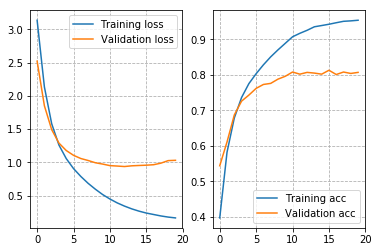

Test accuracy: 0.7707

hidden_layers=2, units=128



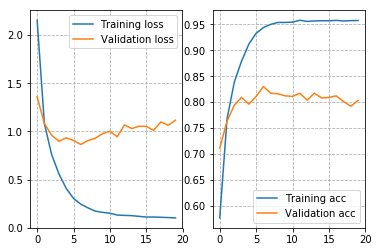

Test accuracy: 0.7796

hidden_layers=1, units=64



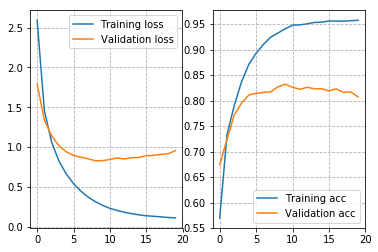

Test accuracy: 0.7876

hidden_layers=2, units=64



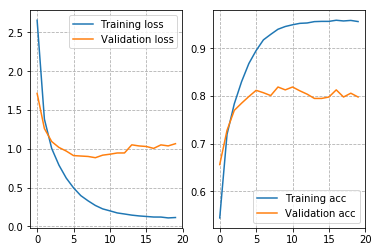

Test accuracy: 0.7898



In [31]:
further_experiments()
further_experiments(units=32)
further_experiments(units=128)
further_experiments(hidden_layers=1)
further_experiments(hidden_layers=2)